# Diabetes Risk Prediction

In [1]:
from google.colab import files
uploaded = files.upload()

# Ek baar upload ho jaye, toh check karein ki file ka naam kya hai
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving framingham.csv to framingham.csv
User uploaded file "framingham.csv" with length 191803 bytes


## Objective
The goal of this project is to predict the **risk of diabetes** based on patient data, including demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of individuals with features relevant to diabetes risk assessment.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for diabetes risk.
4. **Model Training**: Train a classification model to predict diabetes risk.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Load the dataset
# Make sure 'framingham.csv' is uploaded to your Colab session storage
# (agar aapne pehle upload nahi kiya hai to files.upload() wala step yaad rakhna)
df = pd.read_csv('framingham.csv')

# Display basic information about the dataset
print("--- DataFrame Head (First 5 rows) ---")
print(df.head())

print("\n--- DataFrame Info (Columns, Non-Null Counts, Data Types) ---")
df.info()

print("\n--- DataFrame Description (Statistical Summary of Numerical Columns) ---")
print(df.describe())

print("\n--- DataFrame Shape (Rows, Columns) ---")
print(df.shape)

--- DataFrame Head (First 5 rows) ---
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCH

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

--- Missing Values Count Per Column ---
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

--- Total Missing Values in Dataset ---
645


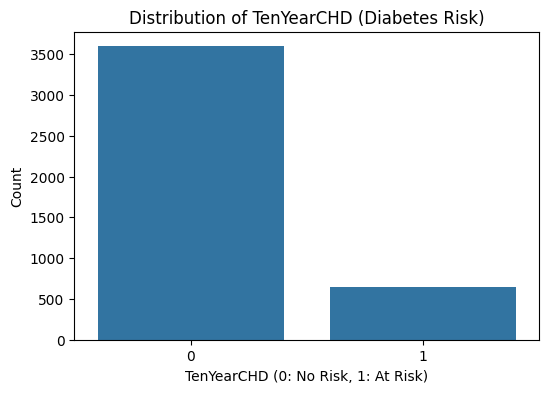

--- Correlation Matrix ---

--- Correlation Heatmap ---


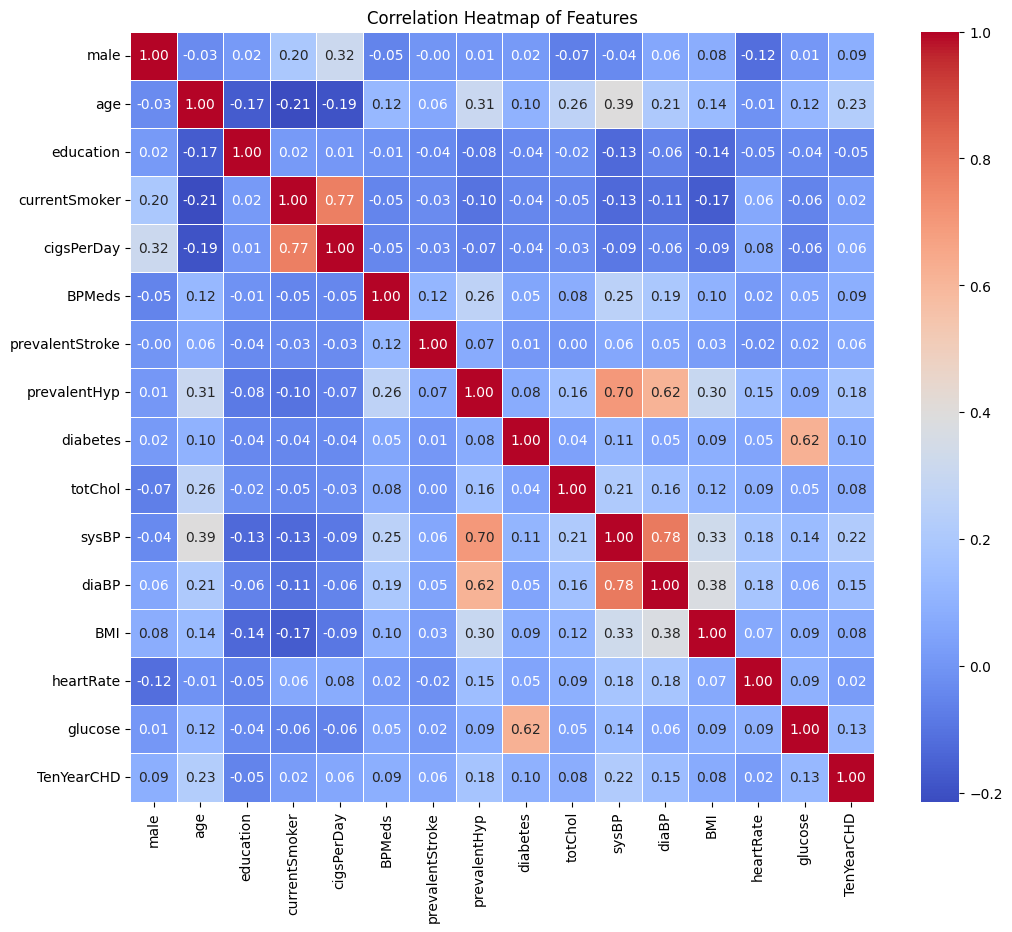

In [6]:

# Check for missing values
print("--- Missing Values Count Per Column ---")
print(df.isnull().sum())

print("\n--- Total Missing Values in Dataset ---")
print(df.isnull().sum().sum())

# Visualize diabetes risk distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TenYearCHD' is the target variable for diabetes risk prediction
# If your target column has a different name, replace 'TenYearCHD' with that name
if 'TenYearCHD' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='TenYearCHD', data=df)
    plt.title('Distribution of TenYearCHD (Diabetes Risk)')
    plt.xlabel('TenYearCHD (0: No Risk, 1: At Risk)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Target column 'TenYearCHD' not found. Please check your dataset's column names.")

# You can also visualize distributions of other important numerical features
# For example, distribution of 'age'
# plt.figure(figsize=(8, 5))
# sns.histplot(df['age'], kde=True)
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()
# Identify correlations between features
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Correlation Matrix ---")
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation matrix

# Display the correlation matrix (optional, can be very large)
# print(correlation_matrix)

print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [10]:
print("--- Checking for Missing Values ---")
print(df.isnull().sum()) # Pehle check kar rahe hain

# Check if there are any missing values at all
if df.isnull().sum().sum() == 0:
    print("\nGreat! No missing values found in the dataset. Moving on.")
else:
    print("\n--- Handling Missing Values ---")
    # Handle Numerical Missing Values (fill with median)
    numerical_cols_with_missing = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()]
    for col in numerical_cols_with_missing:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {median_val}")

    # Handle Categorical Missing Values (fill with mode)
    categorical_cols_with_missing = df.select_dtypes(include=['object', 'category']).columns[df.select_dtypes(include=['object', 'category']).isnull().any()]
    for col in categorical_cols_with_missing:
        mode_val = df[col].mode()[0] # .mode() returns a Series, take the first element
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: {mode_val}")

    print("\n--- Missing Values After Handling ---")
    print(df.isnull().sum()) # Dobara check kar rahe hain
    if df.isnull().sum().sum() == 0:
        print("\nAll missing values have been successfully handled.")
    else:
        print("\nWarning: Some missing values still exist. Please review.")
# Drop unnecessary columns (e.g., Patient ID if present)
# Check if 'id' or 'patient_id' column exists and drop it
if 'id' in df.columns: # Framingham dataset sometimes has 'id' column
    df = df.drop('id', axis=1)
    print("Dropped 'id' column.")
elif 'Patient_ID' in df.columns:
    df = df.drop('Patient_ID', axis=1)
    print("Dropped 'Patient_ID' column.")
else:
    print("Neither 'id' nor 'Patient_ID' column found or already dropped.")

# You can add other columns here if they are identified as unnecessary after EDA
# For example, if 'education' is decided to be dropped (though typically encoded)
# if 'education' in df.columns:
#     df = df.drop('education', axis=1)
#     print("Dropped 'education' column.")

# Display the first few rows after dropping
print("\nDataFrame head after dropping unnecessary columns:")
print(df.head())
print("\nDataFrame info after dropping unnecessary columns:")
df.info()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = df.select_dtypes(include=['number']).columns.tolist()
if 'TenYearCHD' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('TenYearCHD')

print(f"Numerical columns to normalize: {numerical_cols_to_scale}")

scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("\nDataFrame head after Normalization:")
print(df.head())
print("\nDataFrame info after Normalization:")
df.info()
# Define features and target variable


--- Checking for Missing Values ---
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Great! No missing values found in the dataset. Moving on.
Neither 'id' nor 'Patient_ID' column found or already dropped.

DataFrame head after dropping unnecessary columns:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        

## Model Training
Train a **Logistic Regression** model to predict diabetes risk.

In [11]:

# Train a Logistic Regression model

# Predictions


# Model evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Define features (X) and target variable (y) ---
# 'TenYearCHD' is the target variable for diabetes risk prediction in Framingham dataset
X = df.drop('TenYearCHD', axis=1) # All columns except 'TenYearCHD' are features
y = df['TenYearCHD']             # 'TenYearCHD' is the target variable

print("--- Features (X) and Target (y) Defined ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# --- Step 2: Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Split Done ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# --- Step 3: Train a Logistic Regression model ---
print("\n--- Training Logistic Regression Model ---")
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good choice for small datasets
model.fit(X_train, y_train)

print("Logistic Regression Model trained successfully!")

# --- Step 4: Make Predictions ---
print("\n--- Making Predictions on Test Data ---")
y_pred = model.predict(X_test)

# --- Step 5: Model Evaluation ---
print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}") # Accuracy score, formatted to 4 decimal places
print("\nClassification Report:")
print(report)

print("\nModel training and evaluation complete!")

--- Features (X) and Target (y) Defined ---
X shape: (4240, 15)
y shape: (4240,)

--- Data Split Done ---
X_train shape: (3392, 15)
X_test shape: (848, 15)
y_train shape: (3392,)
y_test shape: (848,)

--- Training Logistic Regression Model ---
Logistic Regression Model trained successfully!

--- Making Predictions on Test Data ---

--- Model Evaluation ---
Accuracy: 0.8443

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.41      0.05      0.10       129

    accuracy                           0.84       848
   macro avg       0.63      0.52      0.51       848
weighted avg       0.79      0.84      0.79       848


Model training and evaluation complete!
